In [1]:
import warnings
# hide powerlaw's 'invalid value encountered in true divide' warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import powerlaw
import pylandstats as pls
import seaborn as sns
import swisslandstats as sls
from mpl_toolkits.axes_grid1 import inset_locator

from swiss_urbanization.data import settings

In [2]:
# set 'paper' seaborn style
sns.set('paper')

# get default plot dimensions to be used below
figwidth, figheight = plt.rcParams['figure.figsize']

# keyword arguments to be passed to `savefig`
savefig_kws = {
    'dpi': 300,
    'bbox_inches': 'tight',
    'pad_inches': 0
}

In [3]:
urban_class = settings.EXTRACTS_URBAN
nonurban_class = settings.EXTRACTS_NONURBAN
nodata = settings.EXTRACTS_NODATA

agglomeration_slugs = ['bern', 'lausanne', 'zurich']

In [4]:
agglomeration_dict = {}
for agglomeration_slug in agglomeration_slugs:
    ldf = sls.read_csv(
        f'../data/processed/agglomeration_extracts/{agglomeration_slug}.csv')
    landscapes = []
    dates = []
    for urban_nonurban_column in ldf.columns[ldf.columns.str.startswith('AS')]:
        landscapes.append(
            pls.Landscape(
                ldf.to_ndarray(urban_nonurban_column, nodata=nodata),
                res=ldf.res, nodata=nodata))
        # get the year of the snapshot by taking the most recurrent timestamp
        # (year) among the pixels
        dates.append(
            ldf['FJ' + urban_nonurban_column[2:4]].value_counts().index[0])
    agglomeration_dict[agglomeration_slug] = pls.SpatioTemporalAnalysis(
        landscapes, dates=dates)

Bern
  1981: alpha=1.8745, std err: 0.0184
  1993: alpha=1.8623, std err: 0.0184
  2004: alpha=1.8643, std err: 0.0184


  2013: alpha=1.8623, std err: 0.0183


Lausanne
  1980: alpha=1.8617, std err: 0.0195
  1990: alpha=1.8564, std err: 0.0196
  2005: alpha=1.8490, std err: 0.0193


  2014: alpha=1.8369, std err: 0.0191


Zurich
  1982: alpha=1.8279, std err: 0.0146
  1994: alpha=1.8353, std err: 0.0149
  2007: alpha=1.8204, std err: 0.0149


  2016: alpha=1.8166, std err: 0.0148


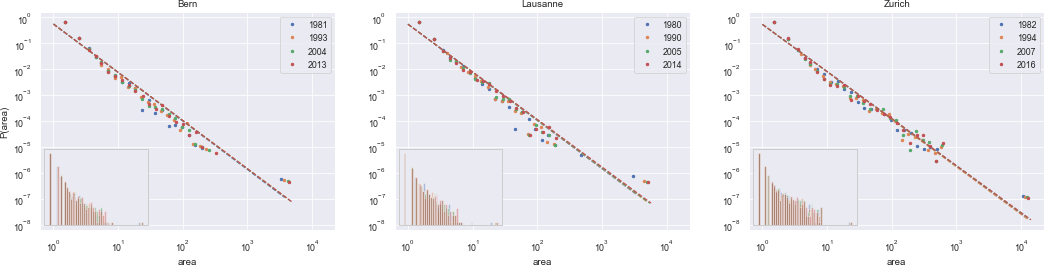

In [5]:
num_cities = len(agglomeration_slugs)
current_palette = sns.color_palette()
fig = plt.figure(figsize=(num_cities * figwidth, figheight))
ax = None  # to pass as `sharex`/`sharey` arguments in the first iteration

for i, agglomeration_slug in enumerate(agglomeration_slugs, start=1):
    # print(agglomeration_slug.capitalize())
    sta = agglomeration_dict[agglomeration_slug]
    ax = fig.add_subplot(1, num_cities, i, sharex=ax, sharey=ax)
    axin = inset_locator.inset_axes(ax, width='35%', height='35%', loc=3)
    print(f'{agglomeration_slug.capitalize()}')
    for k, (date, landscape) in enumerate(zip(sta.dates, sta.landscapes)):
        area_ser = landscape.area(urban_class)
       
        ax.set_title(agglomeration_slug.capitalize())
        color = current_palette[k]

        powerlaw.plot_pdf(area_ser, ax=ax, color=color,
                          linestyle='None', marker='.', label=date)
        sns.distplot(
            np.log(area_ser), kde=False, ax=axin, color=color, hist_kws={'log': True})
        # `xmin=1` because patches cannot have 0 area
        # `discrete=True` because patches are groups of pixels
        fit = powerlaw.Fit(
            area_ser.values, xmin=1, discrete=True, verbose=False)        
        fit.power_law.plot_pdf(ax=ax, color=color, linestyle='--')
        print(f'  {date}: alpha={fit.alpha:.4f}, std err: {fit.sigma:.4f}')

    ax.legend()
    ax.set_xlabel('area')
    axin.set_xticks([])
    axin.set_yticks([])
    axin.axes.get_xaxis().set_visible(False)    

fig.axes[0].set_ylabel('P(area)')
fig.savefig('../reports/figures/size_frequency_distribution.pdf', **savefig_kws)

Bern (1981):
	scaling range covers 87.75419982316534% of patches
	alpha=2.0684788117094755, std err: 0.06419866984328058
Bern (1993):
	scaling range covers 87.38574040219379% of patches
	alpha=1.9986421550146576, std err: 0.06011119387942526
Bern (2004):
	scaling range covers 90.48269581056466% of patches
	alpha=1.9662779460104947, std err: 0.06683884313702611
Bern (2013):
	scaling range covers 90.46112115732369% of patches
	alpha=1.9144564319379285, std err: 0.06295377699154117
Lausanne (1980):
	scaling range covers 80.8085977482088% of patches
	alpha=2.0248841359898093, std err: 0.05292478920640945
Lausanne (1990):
	scaling range covers 80.57441253263707% of patches
	alpha=1.9916337716005068, std err: 0.05141381600065345
Lausanne (2005):


	scaling range covers 80.97938144329896% of patches
	alpha=1.9103890180718626, std err: 0.04739295924478565
Lausanne (2014):
	scaling range covers 80.23983315954119% of patches
	alpha=1.8886124757942477, std err: 0.0456449568963727


Zurich (1982):
	scaling range covers 85.69643972517177% of patches
	alpha=1.8288309989965699, std err: 0.038728729192190586
Zurich (1994):
	scaling range covers 86.93708080485467% of patches
	alpha=1.748518720504857, std err: 0.037011868675485886
Zurich (2007):
	scaling range covers 86.55824759376037% of patches
	alpha=1.7155886601218164, std err: 0.03555788639911943
Zurich (2016):
	scaling range covers 89.18830101873151% of patches
	alpha=1.693568049672451, std err: 0.03823764434911153


Text(0, 0.5, 'P (area)')

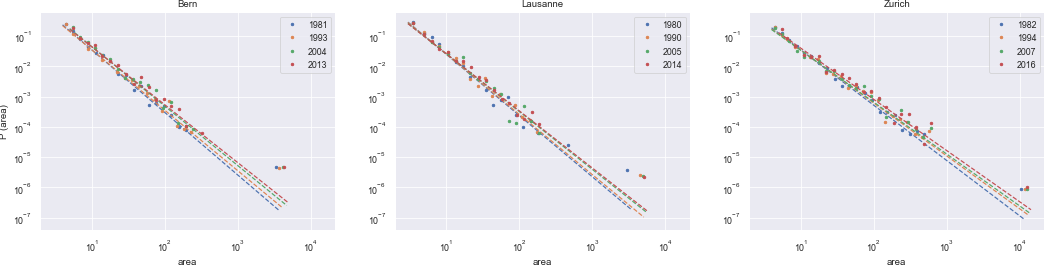

In [6]:
num_cities = len(agglomeration_slugs)
current_palette = sns.color_palette()
fig = plt.figure(figsize=(num_cities * figwidth, figheight))
ax = None  # to pass as `sharey` argument in the first iteration

for i, agglomeration_slug in enumerate(agglomeration_slugs, start=1):
    # print(agglomeration_slug.capitalize())
    sta = agglomeration_dict[agglomeration_slug]
    ax = fig.add_subplot(1, num_cities, i, sharey=ax, sharex=ax)
    for k, (date, landscape) in enumerate(zip(sta.dates, sta.landscapes)):
        area_ser = landscape.area(urban_class)
       
        ax.set_title(agglomeration_slug.capitalize())
        color = current_palette[k]

        fit = powerlaw.Fit(
            area_ser.values, discrete=True, verbose=False)
        fit.power_law.plot_pdf(ax=ax, color=color, linestyle='--')
        print(f'{agglomeration_slug.capitalize()} ({date}):')
        print('\tscaling range covers {}% of patches'.format(
            np.sum(area_ser < fit.xmin) * 100 / len(area_ser)))
        print(f'\talpha={fit.alpha}, std err: {fit.sigma}')
        powerlaw.plot_pdf(area_ser[area_ser >= fit.xmin], ax=ax, color=color,
                          linestyle='None', marker='.', label=date)
        

    ax.legend()
    ax.set_xlabel('area')

fig.axes[0].set_ylabel('P(area)')